타이타닉 생존 예측 - Tree

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ['PATH'] += os.pathsep  + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [4]:
df = pd.read_csv('titanic.csv')
df.shape

(887, 8)

In [5]:
df.Name.nunique()

887

In [7]:
df = df.set_index('Name')

In [10]:
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Siblings', 'Parents', 'Fare']

In [11]:
df.head()

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500


In [12]:
df.Survived.mean() # 38  프로가 생존

0.3855693348365276

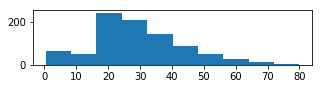

In [22]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Age'].values)

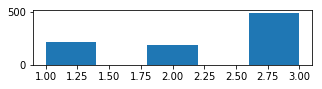

In [26]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Pclass'].values, bins=5)

In [28]:
s = df['Sex']

In [29]:
s.value_counts()

male      573
female    314
Name: Sex, dtype: int64

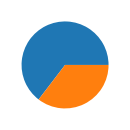

In [36]:
plt.figure(figsize=(5,2))
p = plt.pie(df['Sex'].value_counts(5))

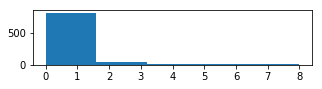

In [30]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Siblings'].values, bins=5)

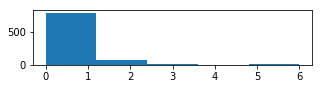

In [38]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Parents'].values, bins=5)

(array([ 24.,  18., 140., 146.,  74.,  59.,  42.,  18.,  17.,   7.]),
 array([ 1. ,  8.3, 15.6, 22.9, 30.2, 37.5, 44.8, 52.1, 59.4, 66.7, 74. ]),
 <a list of 10 Patch objects>)

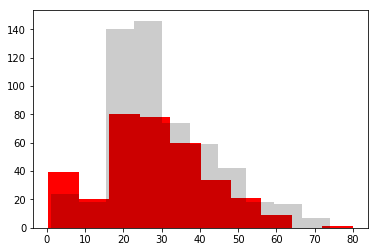

In [34]:
plt.hist(df[df['Survived']==1]['Age'].values, color= 'red')
plt.hist(df[df['Survived']==0]['Age'].values, color = 'black',alpha=0.2)

In [39]:
df.head(1)

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.25


(array([ 81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 233.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <a list of 10 Patch objects>)

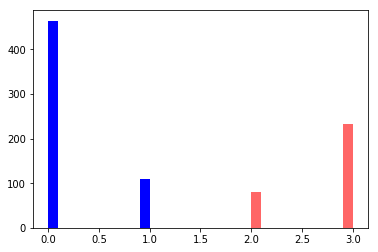

In [42]:
plt.hist(df[df['Sex']=='male']['Survived'].values, color= 'blue')
plt.hist(df[df['Sex']=='female']['Survived'].values+2, color = 'red',alpha=0.6)

In [45]:
df.dtypes

Survived      int64
Pclass       object
Sex          object
Age         float64
Siblings      int64
Parents       int64
Fare        float64
dtype: object

In [44]:
# 1,2,3 등석은 범주형입니다.
df['Pclass'] = df['Pclass'].astype('object')

In [47]:
data = pd.get_dummies(df)

In [53]:
data.head()

,Survived,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,,
Mr. Owen Harris Braund,0,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,1,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,0,35.0,0,0,8.0500,0,0,1,0,1


In [55]:
X = data.drop(columns= 'Survived')
y = data['Survived']

In [57]:
X.head()

,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,
Mr. Owen Harris Braund,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,35.0,0,0,8.0500,0,0,1,0,1


In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(X,y)

In [61]:
model.score(X, y)

0.8489289740698985

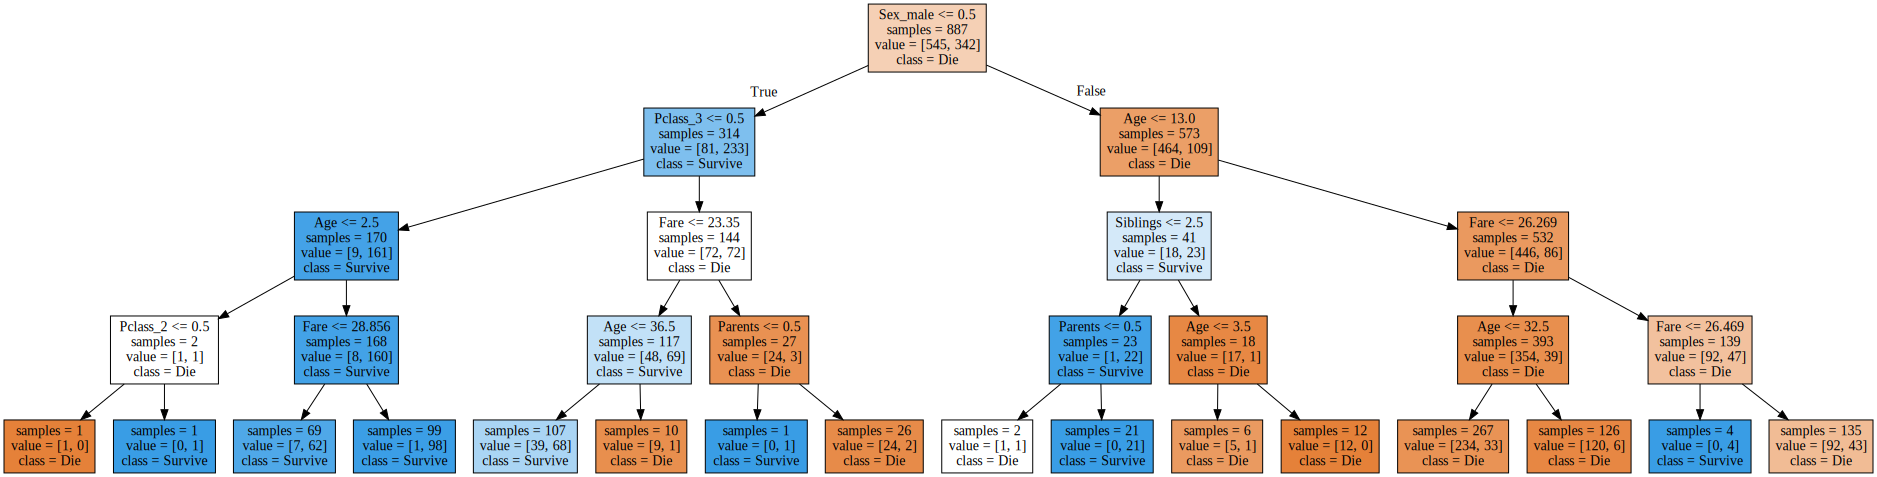

In [63]:
export_graphviz(model, out_file = 'titanic.dot', class_names= ['Die', 'Survive'] 
                , feature_names= X.columns, impurity = False, filled=True)

with open('titanic.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)

In [67]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [68]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [71]:

loans = loans.dropna()
loans.isna().sum().sum()

0

In [72]:
loans['not.fully.paid'].mean()

0.1598360655737705

In [74]:
k = loans

NameError: name 'laons' is not defined

In [76]:
loans.purpose.value_counts()

debt_consolidation    3949
all_other             2290
credit_card           1259
home_improvement       628
small_business         618
major_purchase         432
educational            340
Name: purpose, dtype: int64

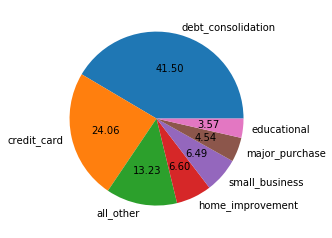

In [79]:

p = plt.pie(loans.purpose.value_counts(), labels= loans.purpose.unique(), autopct= '%.2f')

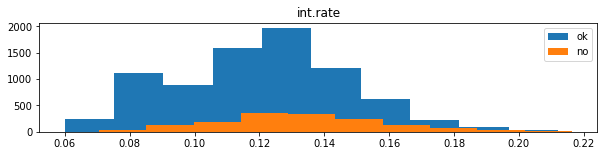

In [82]:
plt.figure(figsize=(10,2))
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==0], label= 'ok')
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==1], label= 'no')
p = plt.title('int.rate')
p = plt.legend()

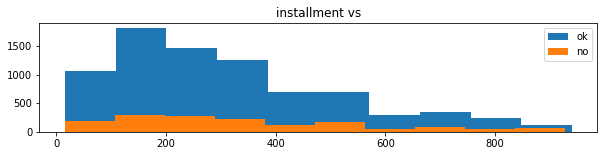

In [81]:
plt.figure(figsize=(10,2))
p = plt.hist(loans['installment'][loans['not.fully.paid']==0], label= 'ok')
p = plt.hist(loans['installment'][loans['not.fully.paid']==1], label= 'no')
p = plt.title('installment vs')
p = plt.legend()

In [83]:
loans = pd.get_dummies(loans) # 카테고리를 원핫 인코딩

In [84]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,0,1,0,0,0,0,0


In [85]:
X = loans.drop(columns = 'not.fully.paid')
y = loans['not.fully.paid']

In [87]:
model = DecisionTreeClassifier(max_depth=4).fit(X,y)
model.score(X, y)

0.842686002522068

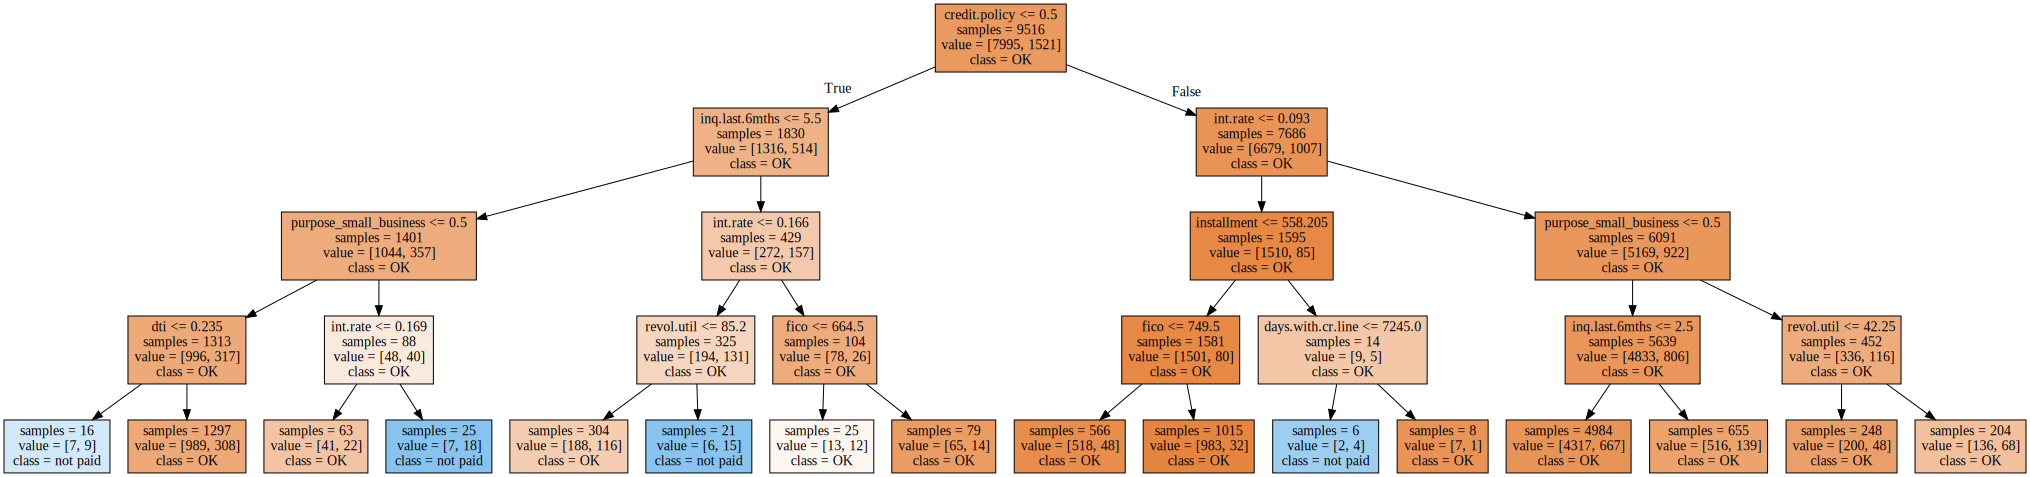

In [88]:
export_graphviz(model, out_file = 'loan.dot', class_names= ['OK', 'not paid'] 
                , feature_names= X.columns, impurity = False, filled=True)

with open('loan.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)